In [1]:
import numpy as np
import matplotlib.pyplot as plt

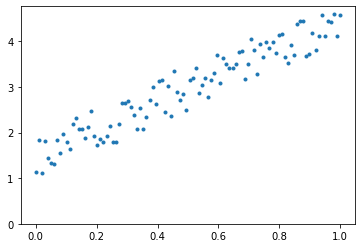

In [2]:
# Beispieldaten erzeugen
X = np.linspace(0, 1, 100)
y = 3 * X + 1 + np.random.rand(X.shape[0])

# Beispieldaten visualisieren
plt.plot(X, y, ".")
plt.ylim(bottom = 0);

In [3]:
from sklearn.linear_model import LinearRegression

modell = LinearRegression()
modell.fit(X.reshape(-1, 1), y)

modell.coef_, modell.intercept_

(array([3.02714388]), 1.4586622276024335)

In [4]:
print(f"Modell: y_hat = {round(modell.coef_[0], 2)} * x + {round(modell.intercept_, 2)}")

Modell: y_hat = 3.03 * x + 1.46


In [5]:
y_hat = modell.predict(X.reshape(-1, 1))
se = sum((y - y_hat)**2)
mse = se/len(y)
rmse = np.sqrt(mse)

print(f"Sum of Squared Errors: {round(np.sum(se), 3)}")
print(f"Mean Squared Error: {round(mse, 3)}")
print(f"Root Mean Squared Error: {round(rmse, 3)}")

Sum of Squared Errors: 7.758
Mean Squared Error: 0.078
Root Mean Squared Error: 0.279


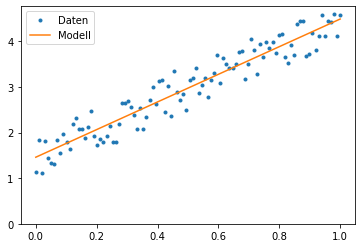

In [6]:
plt.plot(X, y, ".", label = "Daten")
plt.plot(X, y_hat, label = "Modell")
plt.ylim(bottom = 0)
plt.legend();

In [7]:
## neuer Abschnitt

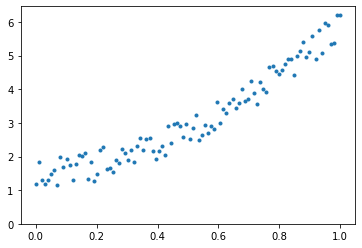

In [8]:
# Beispieldaten erzeugen
X = np.linspace(0, 1, 100)
y = 4 * X**2 + .5 * X + 1 + np.random.rand(X.shape[0])

# Beispieldaten visualisieren
plt.plot(X, y, ".")
plt.ylim(bottom = 0);

In [9]:
modell_1d = LinearRegression(fit_intercept = True)
modell_1d.fit(X.reshape(-1, 1), y)

modell_1d.coef_, modell_1d.intercept_

(array([4.53675182]), 0.8420985105299068)

In [10]:
print(f"Modell: y_hat = {round(modell_1d.coef_[0], 2)} * x + {round(modell_1d.intercept_, 2)}")

Modell: y_hat = 4.54 * x + 0.84


In [11]:
def model_summary(modell: LinearRegression or sklearn.pipeline.Pipeline, X: np.ndarray, y: np.ndarray) -> None:
    """Prints summary of model metrics and plots model against data set"""
    y_hat = modell.predict(X.reshape(-1, 1))
    
    se = sum((y - y_hat)**2)
    mse = se/len(y)
    rmse = np.sqrt(mse)

    print(f"Sum of Squared Errors: {round(np.sum(se), 3)}")
    print(f"Mean Squared Error: {round(mse, 3)}")
    print(f"Root Mean Squared Error: {round(rmse, 3)}")

    plt.plot(X, y, '.', label = "Daten")
    plt.plot(X, y_hat, label = "Modell")
    plt.legend();

Sum of Squared Errors: 16.807
Mean Squared Error: 0.168
Root Mean Squared Error: 0.41


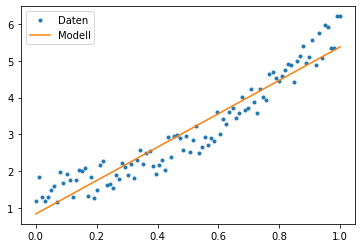

In [12]:
model_summary(modell_1d, X, y)

In [13]:
## neuer Abschnitt

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe_3d = Pipeline([
    ("poly_transform_3d", PolynomialFeatures(3)), # Grad des Polynoms
    ("modell_3d", LinearRegression())
])

pipe_3d.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('poly_transform_3d', PolynomialFeatures(degree=3)),
                ('modell_3d', LinearRegression())])

Sum of Squared Errors: 7.824
Mean Squared Error: 0.078
Root Mean Squared Error: 0.28


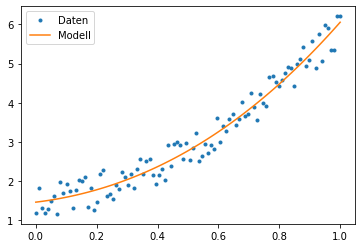

In [15]:
model_summary(pipe_3d, X, y)

In [16]:
pipe_100d = Pipeline([
    ("poly_transform_100d", PolynomialFeatures(100)),
    ("modell_100d", LinearRegression())
])

pipe_100d.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('poly_transform_100d', PolynomialFeatures(degree=100)),
                ('modell_100d', LinearRegression())])

Sum of Squared Errors: 5.512
Mean Squared Error: 0.055
Root Mean Squared Error: 0.235


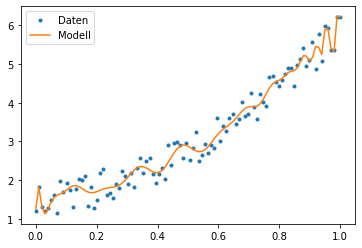

In [17]:
model_summary(pipe_100d, X, y)

In [18]:
## neuer Abschnitt

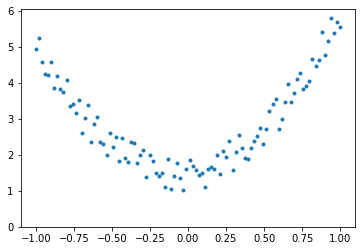

In [19]:
# Testdaten erzeugen
X_test = np.linspace(-1, 1, 100)
y_test = 4 * X_test**2 + .5 * X_test + 1 + np.random.rand(X_test.shape[0]) # Die gleiche Funktion wie vorhin!

# Beispieldaten visualisieren
plt.plot(X_test, y_test, ".")
plt.ylim(bottom = 0);

Sum of Squared Errors: 1127.016
Mean Squared Error: 11.27
Root Mean Squared Error: 3.357


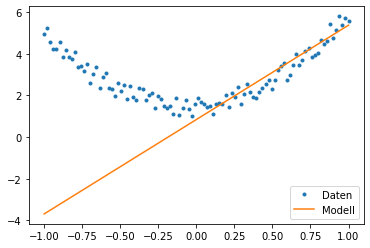

In [20]:
model_summary(modell_1d, X_test, y_test)

Sum of Squared Errors: 53.475
Mean Squared Error: 0.535
Root Mean Squared Error: 0.731


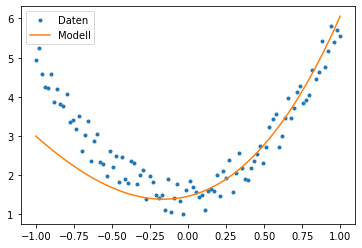

In [21]:
model_summary(pipe_3d, X_test, y_test)

Sum of Squared Errors: 1.8024370151710958e+27
Mean Squared Error: 1.8024370151710957e+25
Root Mean Squared Error: 4245511765583.857


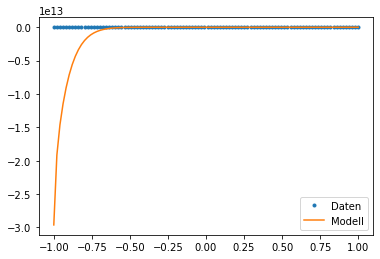

In [22]:
model_summary(pipe_100d, X_test, y_test)

In [23]:
## neuer Abschnitt

In [24]:
pipe_2d = Pipeline([
    ("poly_transform_2d", PolynomialFeatures(2)),
    ("modell_2d", LinearRegression())
])

pipe_2d.fit(X.reshape(-1, 1), y)

Pipeline(steps=[('poly_transform_2d', PolynomialFeatures()),
                ('modell_2d', LinearRegression())])

Sum of Squared Errors: 7.837
Mean Squared Error: 0.078
Root Mean Squared Error: 0.28


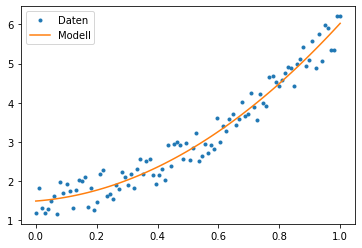

In [25]:
model_summary(pipe_2d, X, y)

Sum of Squared Errors: 9.316
Mean Squared Error: 0.093
Root Mean Squared Error: 0.305


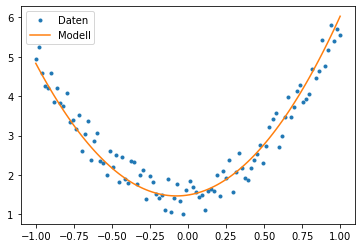

In [26]:
model_summary(pipe_2d, X_test, y_test)

In [27]:
## neuer Abschnitt

In [28]:
def compare_metrics(modell: LinearRegression or Pipeline) -> None:
    """Compares error metrics between training and test trials"""
    y_hat = modell.predict(X.reshape(-1, 1))
    se = sum((y - y_hat)**2)
    mse = se/len(y)
    rmse = np.sqrt(mse)
  
    y_hat_test = modell.predict(X_test.reshape(-1, 1))
    se_test = sum((y_test - y_hat_test)**2)
    mse_test = se_test/len(y_test)
    rmse_test = np.sqrt(mse_test)

    print(f"Sum of Squared Errors: {round(np.sum(se), 3)} (training) vs. {round(np.sum(se_test), 3)} (test)")
    print(f"Mean Squared Error: {round(mse, 3)} (training) vs. {round(np.sum(mse_test), 3)} (test)")
    print(f"Root Mean Squared Error: {round(rmse, 3)} (training) vs. {round(np.sum(rmse_test), 3)} (test)")    

In [29]:
def plot_preds(model: LinearRegression or Pipeline) -> None:
    """Plots model predictions against actual test labels"""
    plt.plot(y_test, model.predict(X_test.reshape(-1, 1)), '.')
    plt.xlabel("y_test")
    plt.ylabel("model_prediction");

In [30]:
compare_metrics(modell_1d)

Sum of Squared Errors: 16.807 (training) vs. 1127.016 (test)
Mean Squared Error: 0.168 (training) vs. 11.27 (test)
Root Mean Squared Error: 0.41 (training) vs. 3.357 (test)


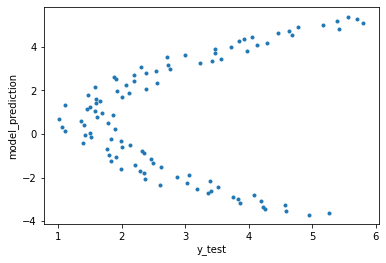

In [31]:
plot_preds(modell_1d)

In [32]:
compare_metrics(pipe_3d)

Sum of Squared Errors: 7.824 (training) vs. 53.475 (test)
Mean Squared Error: 0.078 (training) vs. 0.535 (test)
Root Mean Squared Error: 0.28 (training) vs. 0.731 (test)


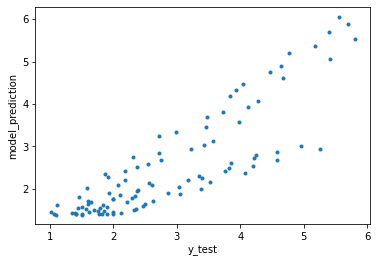

In [33]:
plot_preds(pipe_3d)

In [34]:
compare_metrics(pipe_100d)

Sum of Squared Errors: 5.512 (training) vs. 1.8024370151710958e+27 (test)
Mean Squared Error: 0.055 (training) vs. 1.8024370151710957e+25 (test)
Root Mean Squared Error: 0.235 (training) vs. 4245511765583.857 (test)


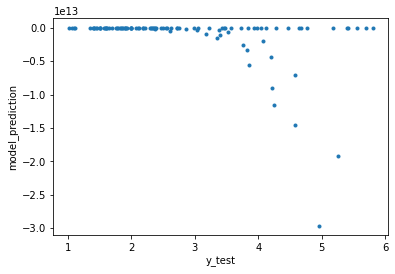

In [35]:
plot_preds(pipe_100d)

In [36]:
compare_metrics(pipe_2d)

Sum of Squared Errors: 7.837 (training) vs. 9.316 (test)
Mean Squared Error: 0.078 (training) vs. 0.093 (test)
Root Mean Squared Error: 0.28 (training) vs. 0.305 (test)


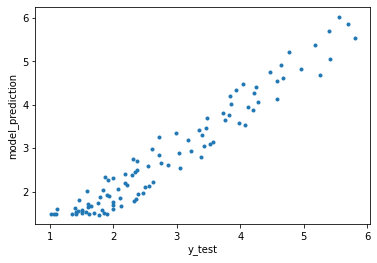

In [37]:
plot_preds(pipe_2d)

In [38]:
pipe_2d[1].coef_, pipe_2d[1].intercept_

(array([0.        , 0.59746035, 3.93929147]), 1.4920152854480744)

In [39]:
print(f"y_hat = {round(pipe_2d[1].coef_[2], 2)} * x^2 + {round(pipe_2d[1].coef_[1], 2)} * x + {round(pipe_2d[1].intercept_, 2)}")

y_hat = 3.94 * x^2 + 0.6 * x + 1.49


In [40]:
observation = 5

print(pipe_2d[1].coef_[2] * (observation)**2 + pipe_2d[1].coef_[1] * (observation) + pipe_2d[1].intercept_)
print(pipe_2d.predict(np.array([observation]).reshape(-1, 1)))

102.96160383463781
[102.96160383]
